In [70]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi

    def net_input(self, X):
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

In [71]:
import pandas as pd

df = pd.read_csv("OR_tst.csv", header=None)
df.head()

,0,1,2
0,-1.03060,1.02200,1
1,-1.01810,-1.01830,-1
2,-0.96415,0.98994,1
3,0.99095,1.02280,1
4,1.00730,1.00700,1


In [72]:
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.020103,-0.029339,0.570000
std,1.003760,1.001576,0.823707
min,-1.045800,-1.043800,-1.000000
25%,-0.999785,-0.999578,1.000000
50%,0.957050,-0.954500,1.000000
75%,1.002725,0.998727,1.000000
max,1.041400,1.045700,1.000000


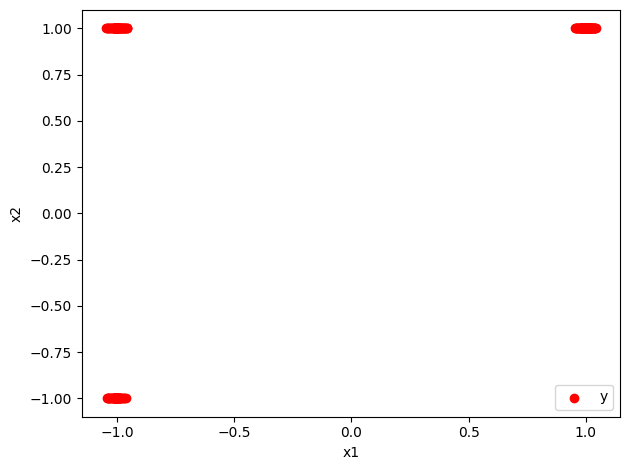

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

X_all = df.iloc[:,[0,2]].values

#print(X_all)

plt.scatter(X_all[:2000, 0], X_all[:2000, 1], color='red', marker='o', label='y')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

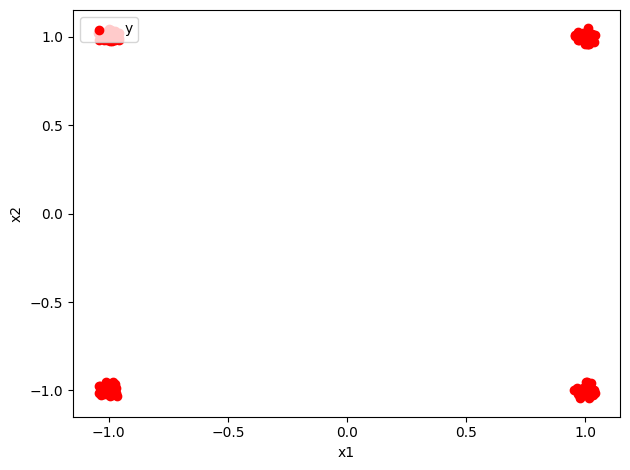

In [74]:
X = df.iloc[0:2000, [0, 1]].values

# plot data
plt.scatter(X[:2000, 0], X[:2000, 1], color='red', marker='o', label='y')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

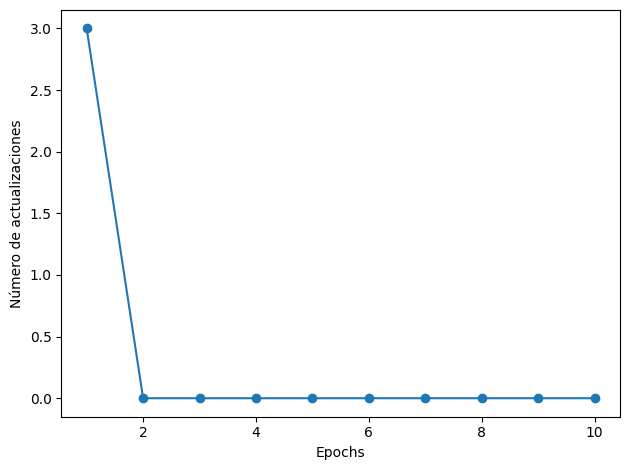

In [75]:
# selecccionar Setosa y Versicolor.
y = df.iloc[0:2000, 2].values
y = np.where(y == -1, -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

In [76]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

<ipython-input-76-30b0c43792e2>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-76-30b0c43792e2>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


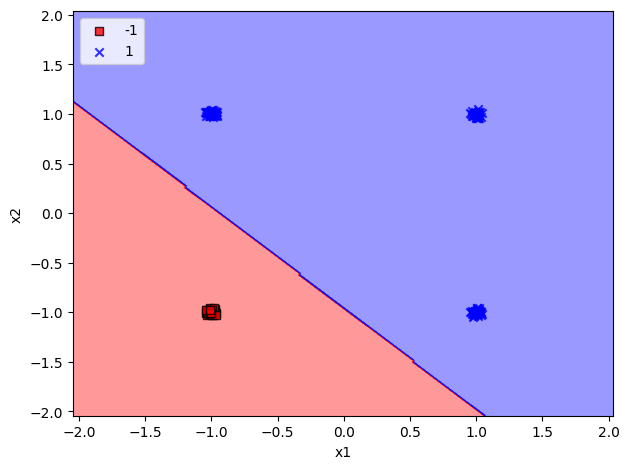

In [77]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()